#### Question 4

The following equations describe the polygon that make the edges of the site


* $$ 2x - 3y <= 2100 $$ 
* $$ 3x - y <= 1500 $$
* $$ y >= 0 $$
* $$ x >= 0 $$
* $$ y <= 500 $$

Based on these equations, we must construct a Chebyshev circle that is optimal and atleast 50 meters away from the edge of the polygon described by the above equations. 


In [94]:
A = [2 3; 3 -1; 0 1; -1 0; 0 -1];
b = [2100; 1500; 500; -1; -1]

using JuMP, Clp

m = Model(solver=ClpSolver())
@variable(m, r >= 0)
@variable(m, x[1:2] >= 0)
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + (r)*norm(A[i,:]) <= b[i])
end
@objective(m, Max, r)

status = solve(m)
center = getvalue(x)
radius = getvalue(r)

println(status)
println("The coordinates of the Chebychev center are: ", center)
println("The largest possible radius is ", radius)


Optimal
The coordinates of the Chebychev center are: [244.448, 244.448]
The largest possible radius is 243.4475064919119


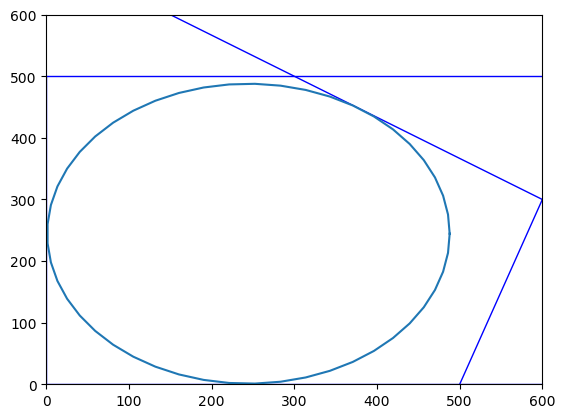

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbf4eb04ed0>

In [95]:
using PyPlot
using PyCall

w = linspace(0,600,100)
c = 700 + (-2/3)w

xlim((0,600))
ylim((0,600))

plot(w,c, "b-", linewidth = 1)

c = 3w + (-1500)
plot(w,c, "b-", linewidth = 1)

c = 500 + 0w
plot(w,c, "b-", linewidth = 1)

c = 0 + 0w
plot(w,c, "b-", linewidth = 1)

plot([0 for i in 1:500], 1:500, "b-", linewidth = 1)

rad = linspace(0,2pi)
x1 = 244.448 + 243.4475064919119*cos.(rad)
y1 = 244.448 + 243.4475064919119*sin.(rad)
plot(x1,y1)



The figure above indicates the circle with the optimal radius **if we DID NOT consider that the walls of the museum be 50 feet from the edge **. 

The above circle is created through maximization of the smallest perpendicular lengths to the edges of the plot from the Chebyshev center. Hence, if we deduct 50 feet from this radius. It will be exactly 50 meters away from the closest edge. This implies that the new circle formed will be atleast 50 meters away from the other edges. Plotted below:


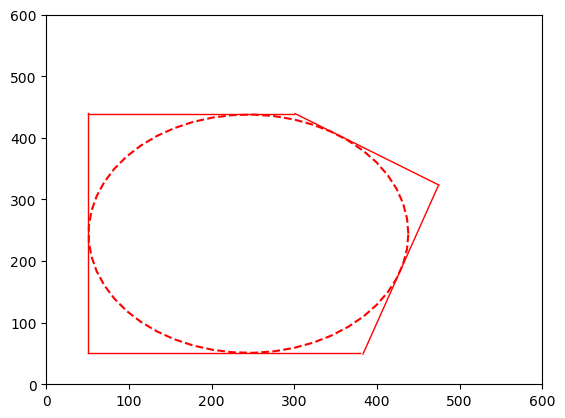

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbf4cc4d510>

In [143]:

w = linspace(0,600,100)
c = 700 + (-2/3)w

xlim((0,600))
ylim((0,600))

w = linspace(301,475)
c = 640 + (-2/3)w
plot(w,c, "r-", linewidth = 1)



w = linspace(383,474,100)
c = 3w + (-1100)
plot(w,c, "r-", linewidth = 1)


w = linspace(50,300,100)
c = 439 + 0w
plot(w,c, "r-", linewidth = 1)

w = linspace(50,380,100)
c = 50 + 0w
plot(w,c, "r-", linewidth = 1)

#plot([0 for i in 1:500], 1:500, "b-", linewidth = 1)
plot([50 for i in 50:440], 50:440, "r-", linewidth = 1)


rad = linspace(0,2pi)
x1 = 244.448 + (243.4475064919119+ (-50))*cos.(rad)
y1 = 244.448 + (243.4475064919119+ (-50))*sin.(rad)
plot(x1,y1, "r--")

This circular footprint of the museum will be the dotted circle and the polygon described by the lines are the new walls of the museum.